<a href="https://colab.research.google.com/github/vaidande/DogVsWolves-Xception-VGG16-ResNet50/blob/main/DogsVsWolves_Xception_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2
import numpy as np
from glob import glob

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
 
train_data = train_datagen.flow_from_directory('/content/gdrive/MyDrive/kaggle_dataset/DogsVsWolves/data', 
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'categorical',
                                               shuffle = True,
                                               subset = 'training')
test_data = val_datagen.flow_from_directory('/content/gdrive/MyDrive/kaggle_dataset/DogsVsWolves/data',
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'categorical',
                                               shuffle = False,
                                               subset = 'validation')

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [4]:
xception = Xception(input_shape=(224, 224, 3), weights='imagenet', include_top=False) #+ [3]: No. of channels.(RGB)
                                                                                   #weights='imagnet': retrives the same weights which where used in the ImageNet competition.
                                                                                   #include_top=False: removes the default VGG16 input, Flatten and Output layer.

83689472/83683744 [==============================] - 1s 0us/step


In [5]:
xception.trainable = False

In [15]:
x = Flatten()(xception.output)
x = Dense(2, activation='softmax', kernel_regularizer=l2(0.01))(x)
model = Model(inputs=xception.input, outputs=x)

In [16]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [17]:
model.compile(loss='squared_hinge', optimizer='adam', metrics=['accuracy'])

In [18]:
metric = 'val_accuracy'
checkpoint = ModelCheckpoint("/content/gdrive/MyDrive/kaggle_dataset/DogsVsWolves/dogsvswolves_svm.h5", monitor = metric, save_best_only=True, mode = 'auto', verbose = 1)

In [19]:
r = model.fit_generator(train_data,
                        validation_data = test_data,
                        epochs = 20, callbacks = [checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
50/50 [==============================] - 551s 11s/step - loss: 0.7516 - accuracy: 0.8910 - val_loss: 0.6312 - val_accuracy: 0.9700

Epoch 00001: val_accuracy improved from -inf to 0.97000, saving model to /content/gdrive/MyDrive/kaggle_dataset/DogsVsWolves/dogsvswolves_svm.h5
Epoch 2/20
50/50 [==============================] - 32s 638ms/step - loss: 0.6694 - accuracy: 0.9528 - val_loss: 0.6254 - val_accuracy: 0.9725

Epoch 00002: val_accuracy improved from 0.97000 to 0.97250, saving model to /content/gdrive/MyDrive/kaggle_dataset/DogsVsWolves/dogsvswolves_svm.h5
Epoch 3/20
50/50 [==============================] - 32s 645ms/step - loss: 0.6392 - accuracy: 0.9657 - val_loss: 0.6331 - val_accuracy: 0.9675

Epoch 00003: val_accuracy did not improve from 0.97250
Epoch 4/20
50/50 [==============================] - 32s 637ms/step - loss: 0.6765 - accuracy: 0.9449 - val_loss: 0.6223 - val_accuracy: 0.9800

Epoch 00004: val_accuracy improved from 0.97250 to 0.98000, saving model to /

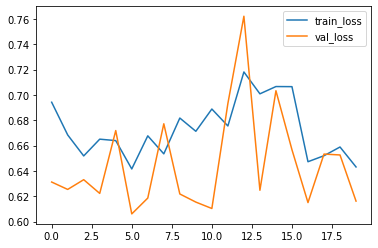

<Figure size 432x288 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig('Loss_ValLoss')

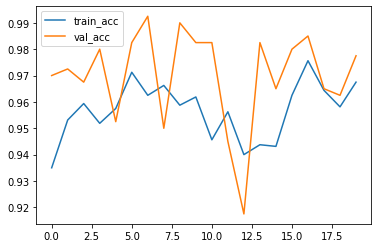

<Figure size 432x288 with 0 Axes>

In [21]:
plt.plot(r.history['accuracy'], label='train_acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig('Acc_ValAcc')

In [22]:
from tensorflow.keras.models import load_model
model = load_model('/content/gdrive/MyDrive/kaggle_dataset/DogsVsWolves/dogsvswolves_svm.h5')

In [23]:
x=image.load_img('/content/gdrive/MyDrive/kaggle_dataset/DogsVsWolves/5315.jpg',target_size=(224,224))

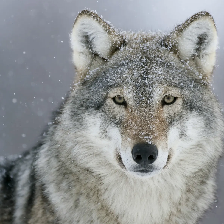

In [24]:
x

In [25]:
test_img = image.img_to_array(x)
test_img = test_img/255
test_img = np.expand_dims(test_img, axis = 0)
result = model.predict(test_img)

In [26]:
a=np.argmax(result, axis=1)

In [27]:
if a==1:
  print("Its a Wolf!")
else:
  print("Its a Dog!")

Its a Wolf!


In [28]:
x2=image.load_img('/content/gdrive/MyDrive/kaggle_dataset/DogvsCat-8000-2000/dataset/single_prediction/pixie_grass.jpg',target_size=(224,224))

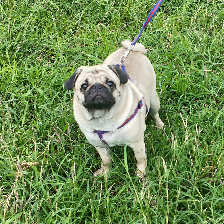

In [29]:
x2

In [30]:
test_img2 = image.img_to_array(x2)
test_img2 = test_img2/255
test_img2 = np.expand_dims(test_img2, axis = 0)
result2 = model.predict(test_img2)

In [31]:
a2=np.argmax(result2, axis=1)

In [32]:
if a2==1:
  print("Its a Wolf!")
else:
  print("Its a Dog!")

Its a Dog!
